In [1]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from astropy.time import Time

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'


Bad key "legend.title_fontsize" on line 22 in
/Users/brettlv/.matplotlib/stylelib/notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
pwd

import os 
os.chdir('/Users/brettlv/timing_analysis/python_ccf_code/Release/CPython/')
#os.chdir('/Users/brettlv/timing_analysis/python_ccf_code/Release/PurePython/')

In [23]:
ls /Users/brettlv/Downloads/NGC1566/dcf_file/dcf*.csv > /Users/brettlv/Downloads/NGC1566/dcf_file/dcf_ngc1566.txt

In [24]:
cat /Users/brettlv/Downloads/NGC1566/dcf_ngc1566.txt

In [27]:
dcf_lists=[]
with open ('/Users/brettlv/Downloads/NGC1566/dcf_file/dcf_ngc1566.txt','r') as f:
    dcf_list=f.readlines()
    for line in dcf_list:
        dcf_lists.append(line.rstrip('\n')) 

In [28]:
for i,l in enumerate(dcf_lists):
    print(i,l.split('/')[-1][4:-4])

(0, 'ASAS_V_data')
(1, 'combined_V')
(2, 'e12_xrt_fit_NGC1566')
(3, 'neowise_w1mpro_allwise_data')
(4, 'neowise_w1mpro_data')
(5, 'neowise_w2mpro_allwise_data')
(6, 'neowise_w2mpro_data')
(7, 'neowise_w3mpro_allwise_data')
(8, 'neowise_w4mpro_allwise_data')
(9, 'uvot-b')
(10, 'uvot-u')
(11, 'uvot-uvm2')
(12, 'uvot-uvw1')
(13, 'uvot-uvw2')
(14, 'uvot-v')
(15, 'wise_multi_w1mpro_ep_data')
(16, 'wise_multi_w2mpro_ep_data')
(17, 'wise_multi_w3mpro_ep_data')
(18, 'wise_multi_w4mpro_ep_data')
(19, 'xrt_fit_NGC1566')


## def_plot

In [29]:
def plot_dcf(m,dcf_lists):
    dcf_path=dcf_lists[m]   
    dcf_data=pd.read_csv(dcf_path,header=None)
    plt.errorbar(dcf_data[0], dcf_data[1],dcf_data[2],fmt='.',label=dcf_path.split('/')[-1][4:-4])
    plt.legend(loc=(1.0,0.5))

(58000, 59000)

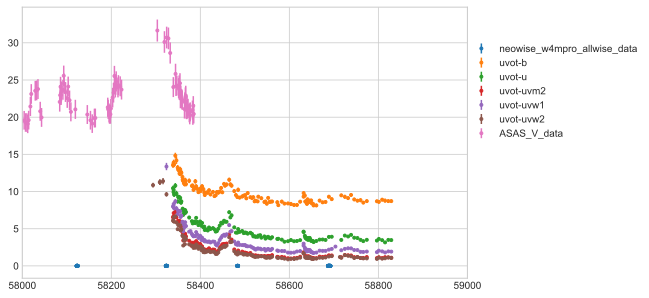

In [30]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
for i in range(8,14):
    plot_dcf(i,dcf_lists)

plot_dcf(0,dcf_lists)    
    
plt.xlim(58000,59000)

In [31]:
for i,j in enumerate(dcf_lists):
    print(i,j.split('/')[-1][4:-4])

(0, 'ASAS_V_data')
(1, 'combined_V')
(2, 'e12_xrt_fit_NGC1566')
(3, 'neowise_w1mpro_allwise_data')
(4, 'neowise_w1mpro_data')
(5, 'neowise_w2mpro_allwise_data')
(6, 'neowise_w2mpro_data')
(7, 'neowise_w3mpro_allwise_data')
(8, 'neowise_w4mpro_allwise_data')
(9, 'uvot-b')
(10, 'uvot-u')
(11, 'uvot-uvm2')
(12, 'uvot-uvw1')
(13, 'uvot-uvw2')
(14, 'uvot-v')
(15, 'wise_multi_w1mpro_ep_data')
(16, 'wise_multi_w2mpro_ep_data')
(17, 'wise_multi_w3mpro_ep_data')
(18, 'wise_multi_w4mpro_ep_data')
(19, 'xrt_fit_NGC1566')


In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
for i in range(12):
    plt.vlines(56750+i*180,-24,-22.2)
    
plot_dcf(5,dcf_lists)

In [2]:
def get_new_range_data(mjd1, flux1, err1,rangemin,rangemax):
    mjd_s=[]
    flux_s=[]
    err_s=[]
    for i,j,k in zip(mjd1, flux1, err1):
        if i>=rangemin and i<rangemax:
            mjd_s.append(i)
            flux_s.append(j)
            err_s.append(k)
    return np.array(mjd_s),np.array(flux_s),np.array(err_s)

In [3]:
def get_mean_and_err(mjd1, flux1, err1):
    mean_mjd=np.mean(mjd1)
    mean_flux=np.mean(flux1)
    flux_0=flux1-mean_flux
    size=len(mjd1)
    err=np.sqrt(np.sum(err1**2))
    #err=np.sqrt(np.sum(flux_0**2)/(size-1))/np.sqrt(size)*2.0
    #err2=1.253*np.sum(abs(flux_0))/np.sqrt(size*(size-1))/np.sqrt(size)*2.0    
    return mean_mjd,mean_flux,err

(56677.232660736925, 8.031192814129428e-25, 1.2598676571978104e-27, 39)
(56866.670712499705, 7.7635357380081345e-25, 1.1396413363996894e-27, 34)
(57039.707184750005, 7.833739827432362e-25, 1.1685960377345512e-27, 33)
(57228.48531015594, 7.755845889991994e-25, 1.0991011027362482e-27, 32)
(57400.85283333257, 7.89977583456917e-25, 1.2346231759624163e-27, 35)
(57593.1111634125, 7.96854871995309e-25, 1.4466186758932223e-27, 44)
(57761.73569595083, 7.7016181046570515e-25, 1.422534410135539e-27, 48)
(57959.58553316588, 8.781673750637482e-25, 1.3173301457277739e-27, 34)
(58123.30776760027, 1.1917407947415866e-24, 1.8567144042381478e-27, 37)
(58323.7415991457, 2.056410849288689e-24, 3.24345719573786e-27, 35)
(58483.771465625985, 1.0386847372440684e-24, 1.2259562452887424e-27, 20)
(58689.54529071087, 8.54630080312517e-25, 1.867617327904736e-27, 69)


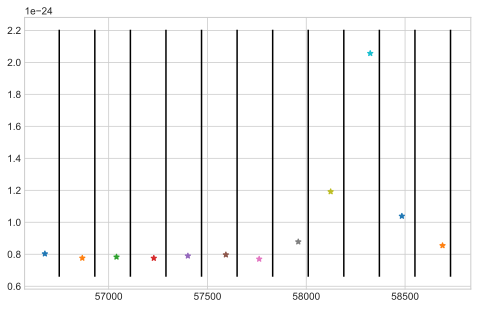

In [34]:
m=4
dcf_path=dcf_lists[m]
dcf_data=pd.read_csv(dcf_path ,header=None)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
#plot_dcf(m,dcf_lists)

rebin_wise_mjd=[]
rebin_wise_flux=[]
rebin_wise_err=[]

for i in range(12):
    rangemin=56750+i*180-180
    rangemax=56750+i*180   
    mjd1, flux1, err1=get_new_range_data(dcf_data[0], dcf_data[1],dcf_data[2],rangemin,rangemax)
    mean_mjd,mean_flux,err=get_mean_and_err(mjd1, flux1, err1)
    print(mean_mjd,mean_flux,err,len(mjd1))
    plt.errorbar(mean_mjd,mean_flux,err,fmt='.',marker='*')
    plt.vlines(56750+i*180,min(dcf_data[1]),max(dcf_data[1]))
    rebin_wise_mjd.append(mean_mjd)
    rebin_wise_flux.append(mean_flux)
    rebin_wise_err.append(err)
    
rebin_neowise_w1=pd.DataFrame({'t':rebin_wise_mjd,'flux':rebin_wise_flux,'err':rebin_wise_err},index=None,columns=['t','flux','err'])    
rebin_neowise_w1.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_file/rebin_dcf_neowise_w1.csv',index=False,header=False)
    

(56677.232660736925, 5.189404991969537e-25, 6.991655065388259e-28, 39)
(56866.670712499705, 4.89666816329106e-25, 6.47510639256386e-28, 34)
(57039.707184750005, 4.728651412973747e-25, 5.987173069786529e-28, 33)
(57228.48531015594, 4.808522192920789e-25, 6.07245044206132e-28, 32)
(57400.85283333257, 5.183407189408177e-25, 6.9613075402341e-28, 35)
(57593.1111634125, 5.4572989549131935e-25, 8.272206517751419e-28, 44)
(57761.73569595083, 5.0057926983927725e-25, 8.116804692783298e-28, 48)
(57959.58553316588, 6.428922132297982e-25, 8.626642873264619e-28, 34)
(58123.30776760027, 1.101748237043925e-24, 1.4335730741900969e-27, 37)
(58323.7415991457, 1.99930337945298e-24, 2.589195019922572e-27, 35)
(58483.771465625985, 9.965034713841115e-25, 9.799833560476935e-28, 20)
(58689.54529071087, 6.246385084726587e-25, 1.177696265324769e-27, 69)


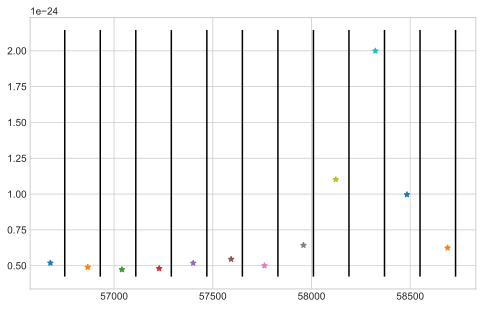

In [36]:
m=6
dcf_path=dcf_lists[m]
dcf_data=pd.read_csv(dcf_path ,header=None)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
#plot_dcf(m,dcf_lists)

rebin_wise_mjd=[]
rebin_wise_flux=[]
rebin_wise_err=[]

for i in range(12):
    rangemin=56750+i*180-180
    rangemax=56750+i*180   
    mjd1, flux1, err1=get_new_range_data(dcf_data[0], dcf_data[1],dcf_data[2],rangemin,rangemax)
    mean_mjd,mean_flux,err=get_mean_and_err(mjd1, flux1, err1)
    print(mean_mjd,mean_flux,err,len(mjd1))
    plt.errorbar(mean_mjd,mean_flux,err,fmt='.',marker='*')
    plt.vlines(56750+i*180,min(dcf_data[1]),max(dcf_data[1]))
    rebin_wise_mjd.append(mean_mjd)
    rebin_wise_flux.append(mean_flux)
    rebin_wise_err.append(err)
rebin_neowise_w2=pd.DataFrame({'t':rebin_wise_mjd,'flux':rebin_wise_flux,'err':rebin_wise_err},index=None,columns=['t','flux','err'])    
rebin_neowise_w2.to_csv('/Users/brettlv/Downloads/NGC1566/dcf_file/rebin_dcf_neowise_w2.csv',index=False,header=False)

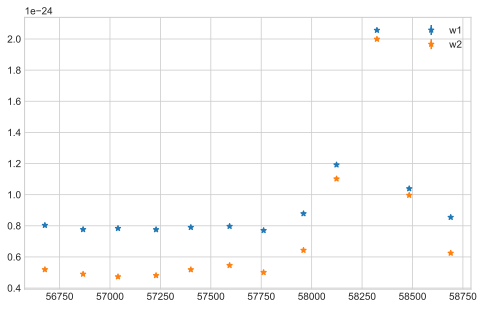

In [37]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
plt.errorbar(rebin_neowise_w1['t'],rebin_neowise_w1['flux'],
             rebin_neowise_w1['err'],fmt='.',marker='*',label='w1')
plt.errorbar(rebin_neowise_w2['t'],rebin_neowise_w2['flux'],
             rebin_neowise_w2['err'],fmt='.',marker='*',label='w2')
plt.legend()

In [10]:
cat /Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w1.csv

56677.232660736925,-24.0957641025641,0.03777830064997631
56866.670712499705,-24.1102,0.03534289178887319
57039.707184750005,-24.106509090909093,0.03576814224977305
57228.48531015594,-24.1111,0.03381597255735815
57400.85283333257,-24.103051428571426,0.03741871189658992
57593.1111634125,-24.099327272727272,0.043517352860669274
57761.73569595083,-24.114191666666667,0.04423754061880023
57959.58553316588,-24.056988235294117,0.03594662710185755
58123.30776760027,-23.924108108108108,0.037174184590922775
58323.7415991457,-23.687462857142858,0.03709231726382163
58483.771465625985,-23.9838,0.028224811779709
58689.54529071087,-24.068788405797097,0.052364873722754265


In [11]:
cat /Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w2.csv

56677.232660736925,-24.285261538461537,0.03265333061113369
56866.670712499705,-24.31064705882353,0.03208488740824876
57039.707184750005,-24.32569696969697,0.030784411639659445
57228.48531015594,-24.3184125,0.030630703550522633
57400.85283333257,-24.285782857142856,0.03248384213728419
57593.1111634125,-24.263290909090905,0.03675214279467253
57761.73569595083,-24.30085,0.03939543120718442
57959.58553316588,-24.192082352941178,0.03246413405590853
58123.30776760027,-23.95807567567568,0.0311384007296457
58323.7415991457,-23.699325714285713,0.03066463761403353
58483.771465625985,-24.00178,0.02354230235129946
58689.54529071087,-24.204631884057974,0.04553152753861878


In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
plot_dcf(0,dcf_lists)
plot_dcf(11,dcf_lists)
plt.xlim(58000,59000)

In [ ]:
''' 0 ASAS_V_data
    1 e12_xrt_fit_NGC1566
    2 neowise_w1mpro_allwise_data
    3 neowise_w1mpro_data
    4 neowise_w2mpro_allwise_data
    5 neowise_w2mpro_data
    6 neowise_w3mpro_allwise_data
    7 neowise_w4mpro_allwise_data
    8 uvot-ubb
    9 uvot-um2
    10 uvot-uuu
    11 uvot-uvv
    12 uvot-uw1
    13 uvot-uw2
    14 wise_multi_w1mpro_ep_data
    15 wise_multi_w2mpro_ep_data
    16 wise_multi_w3mpro_ep_data
    17 wise_multi_w4mpro_ep_data
    18 xrt_fit_NGC1566
    '''